# 1. UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

For This Project:

-A Bank would like to build and train a simple deep neural network model that can Predict the likelihood of a customer buying a personal loan, using data collected of the customers (age, experience, income, etc...)

-The bank issued a marketing campaign that resulted in a 9% success rate.

-The bank management team would like to analyze this campaign result and develop a model to target customers who have high probability of obtaining personal loans

Some features in the data to note:

-Family = Family size

-CCAvg = Average spending on credit cards per month

-Education = (1: Undergrad, 2: Graduate, 3:Advanced/Professional)

-Personal Loan = Did customer accept personal loan offered in last campaign? (1 = Yes, 0 = No)

-CreditCard = Does customer use a credit card issued by Bank? (1=yes, 0=No)

# 2. IMPORT DATASETS AND LIBRARIES

In [1]:
!pip install jupyterthemes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
 jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme - Turn above code on or off by adding/deleting '#' in the front
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [3]:
# Load dataset
bank_df = pd.read_csv('UniversalBank.csv')

In [5]:
# Visualize dataset
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
bank_df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [ ]:
#5000 samples in dataset...

# 3. PERFORM EXPLORATORY DATA ANALYSIS

In [12]:
# Obtain dataframe info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [13]:
# Obtain the statistical summary of the dataframe
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [14]:
# For better visualization
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [15]:
# See how many null values exist in the dataframe
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [16]:
creditcard_customers = bank_df[bank_df['CreditCard'] == 1]

In [17]:
creditcard_customers
#displaying customers with credit cards, or a value of '1' under CreditCard column...

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
15,16,60,30,22,95054,1,1.5,3,0,0,0,0,1,1
19,20,55,28,21,94720,1,0.5,2,0,0,1,0,0,1
24,25,36,11,152,95521,2,3.9,1,159,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,4985,27,1,98,94043,4,2.3,3,0,0,0,0,0,1
4988,4989,34,8,85,95134,1,2.5,1,136,0,0,0,0,1
4990,4991,55,25,58,95023,4,2.0,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.9,2,100,0,0,0,0,1


In [18]:
len(creditcard_customers) #displays how many customers have credit cards

1470

In [20]:
CC_Customers_percent = len(creditcard_customers)/len(bank_df) *100
print('Percentage of customers who have credit cards with Universal Bank = ', CC_Customers_percent, '%')

Percentage of customers who have credit cards with Universal Bank =  29.4 %


In [21]:
accepted_customers = bank_df[bank_df['Personal Loan'] == 1]
accepted_customers

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [23]:
accepted_customer_percent = len(accepted_customers)/len(bank_df) * 100
print('Percentage of Customers who accepted the personal loan = ', accepted_customer_percent, '%')

Percentage of Customers who accepted the personal loan =  9.6 %


# 4. PERFORM DATA VISUALIZATION

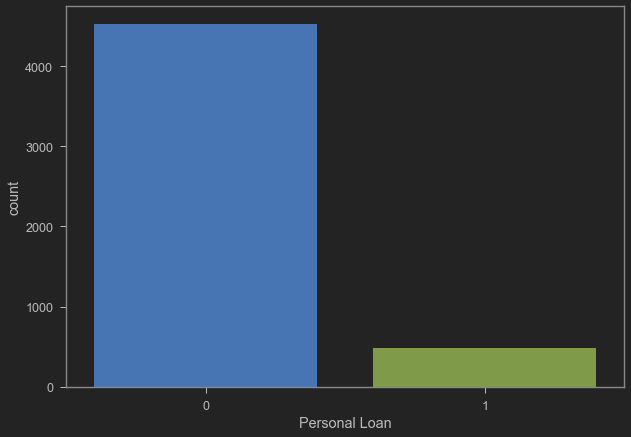

In [24]:
# Visualize personal Loan column 
# Percentage of customers who accepted personal loan ~ 9%
plt.figure(figsize = (10, 7))
sns.countplot(bank_df['Personal Loan'])

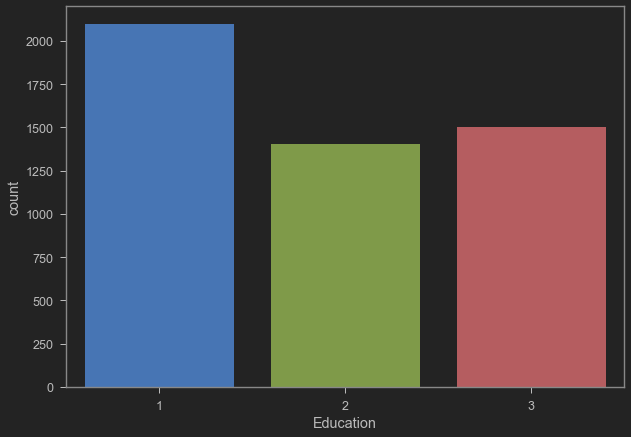

In [25]:
# Visualize Education feature
plt.figure(figsize = (10,7))
sns.countplot(bank_df['Education'])

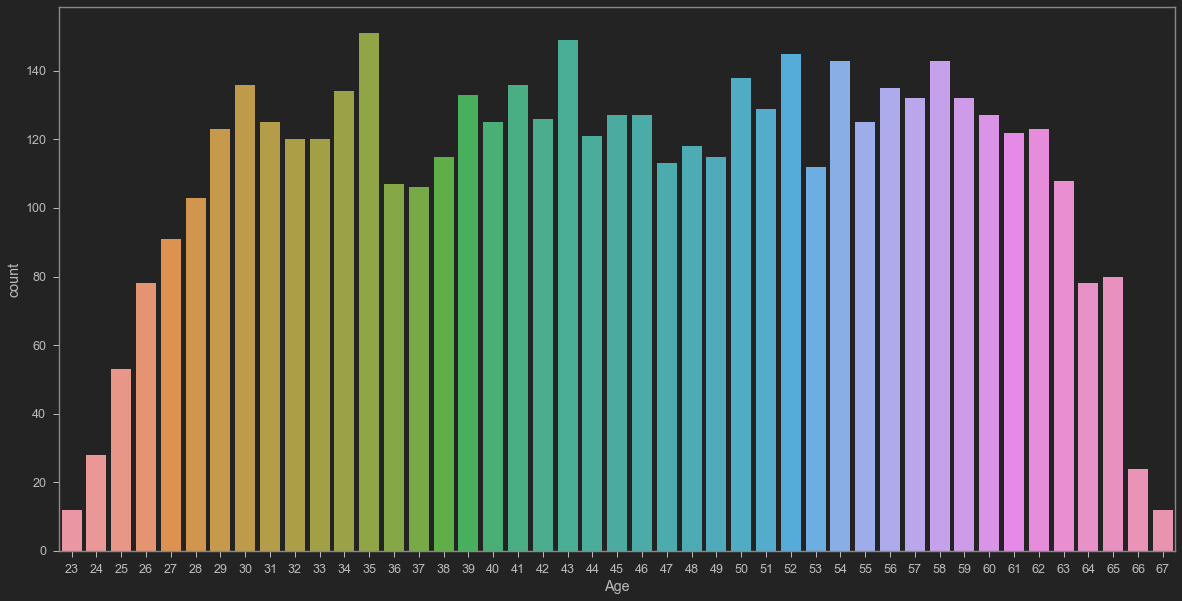

In [26]:
# Visualize Age
# Uniform distribution between 30-60 years
plt.figure(figsize = (20, 10))
sns.countplot(bank_df['Age'])

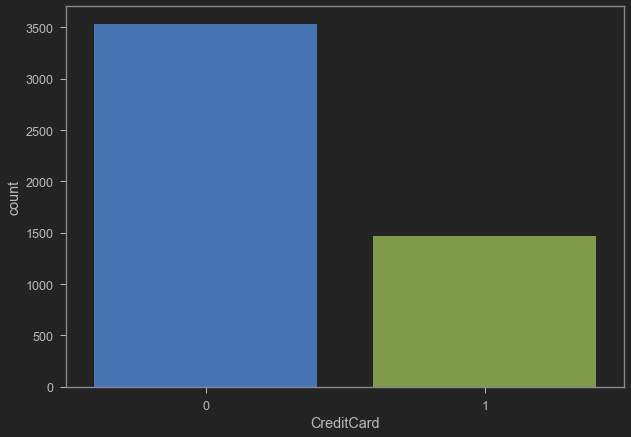

In [27]:
# Visualize credit card availability feature
# Recall that ~29% of customers have credit cards
plt.figure(figsize = (10,7))
sns.countplot(bank_df['CreditCard'])

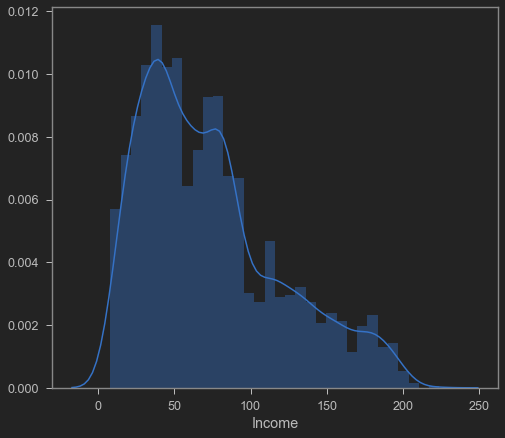

In [28]:
# Visualize income data
# Most customers have incomes that range between 45K and 60K per year
# Data is skewed with less customers earning above 100K
sns.distplot(bank_df['Income'])

In [29]:
# Create two dataframes for the two classes
personalloans = bank_df[bank_df['Personal Loan'] == 1]
no_personalloans = bank_df[bank_df['Personal Loan'] == 0]

In [30]:
personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [31]:
# Mean income of customers who have personal loans is generally high ~ 144K and average CC of 3.9K
personalloans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [19]:
no_personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [32]:
# Mean income of customers who have do not have personal loans is generally low ~ 66K and average CC of 1.7K
no_personalloans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,1448.299331,11.450427,11.456672,40.578534,2156.949654,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1259.750000,35.000000,10.000000,35.000000,91911.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2518.500000,45.000000,20.000000,59.000000,93437.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,3768.250000,55.000000,30.000000,84.000000,94608.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


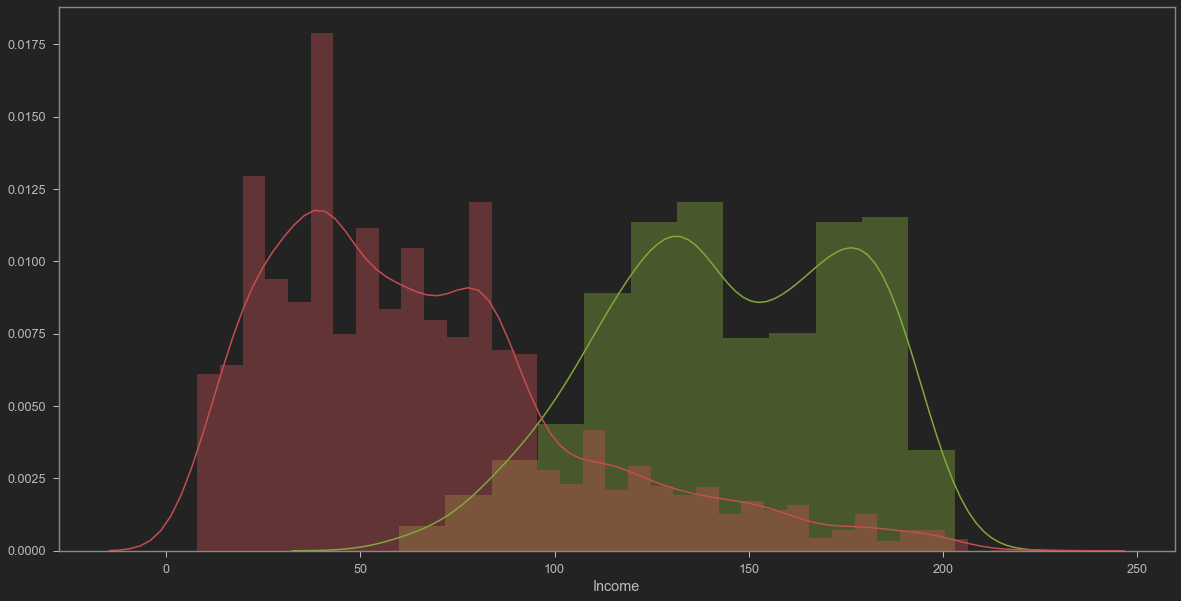

In [33]:
# Plot the distribution plot for both classes separately 
# Customers who took personal loans tend to have higher income
plt.figure(figsize = (20, 10))
sns.distplot(personalloans['Income'], color = 'g')
sns.distplot(no_personalloans['Income'], color = 'r')

<Figure size 2160x2160 with 0 Axes>

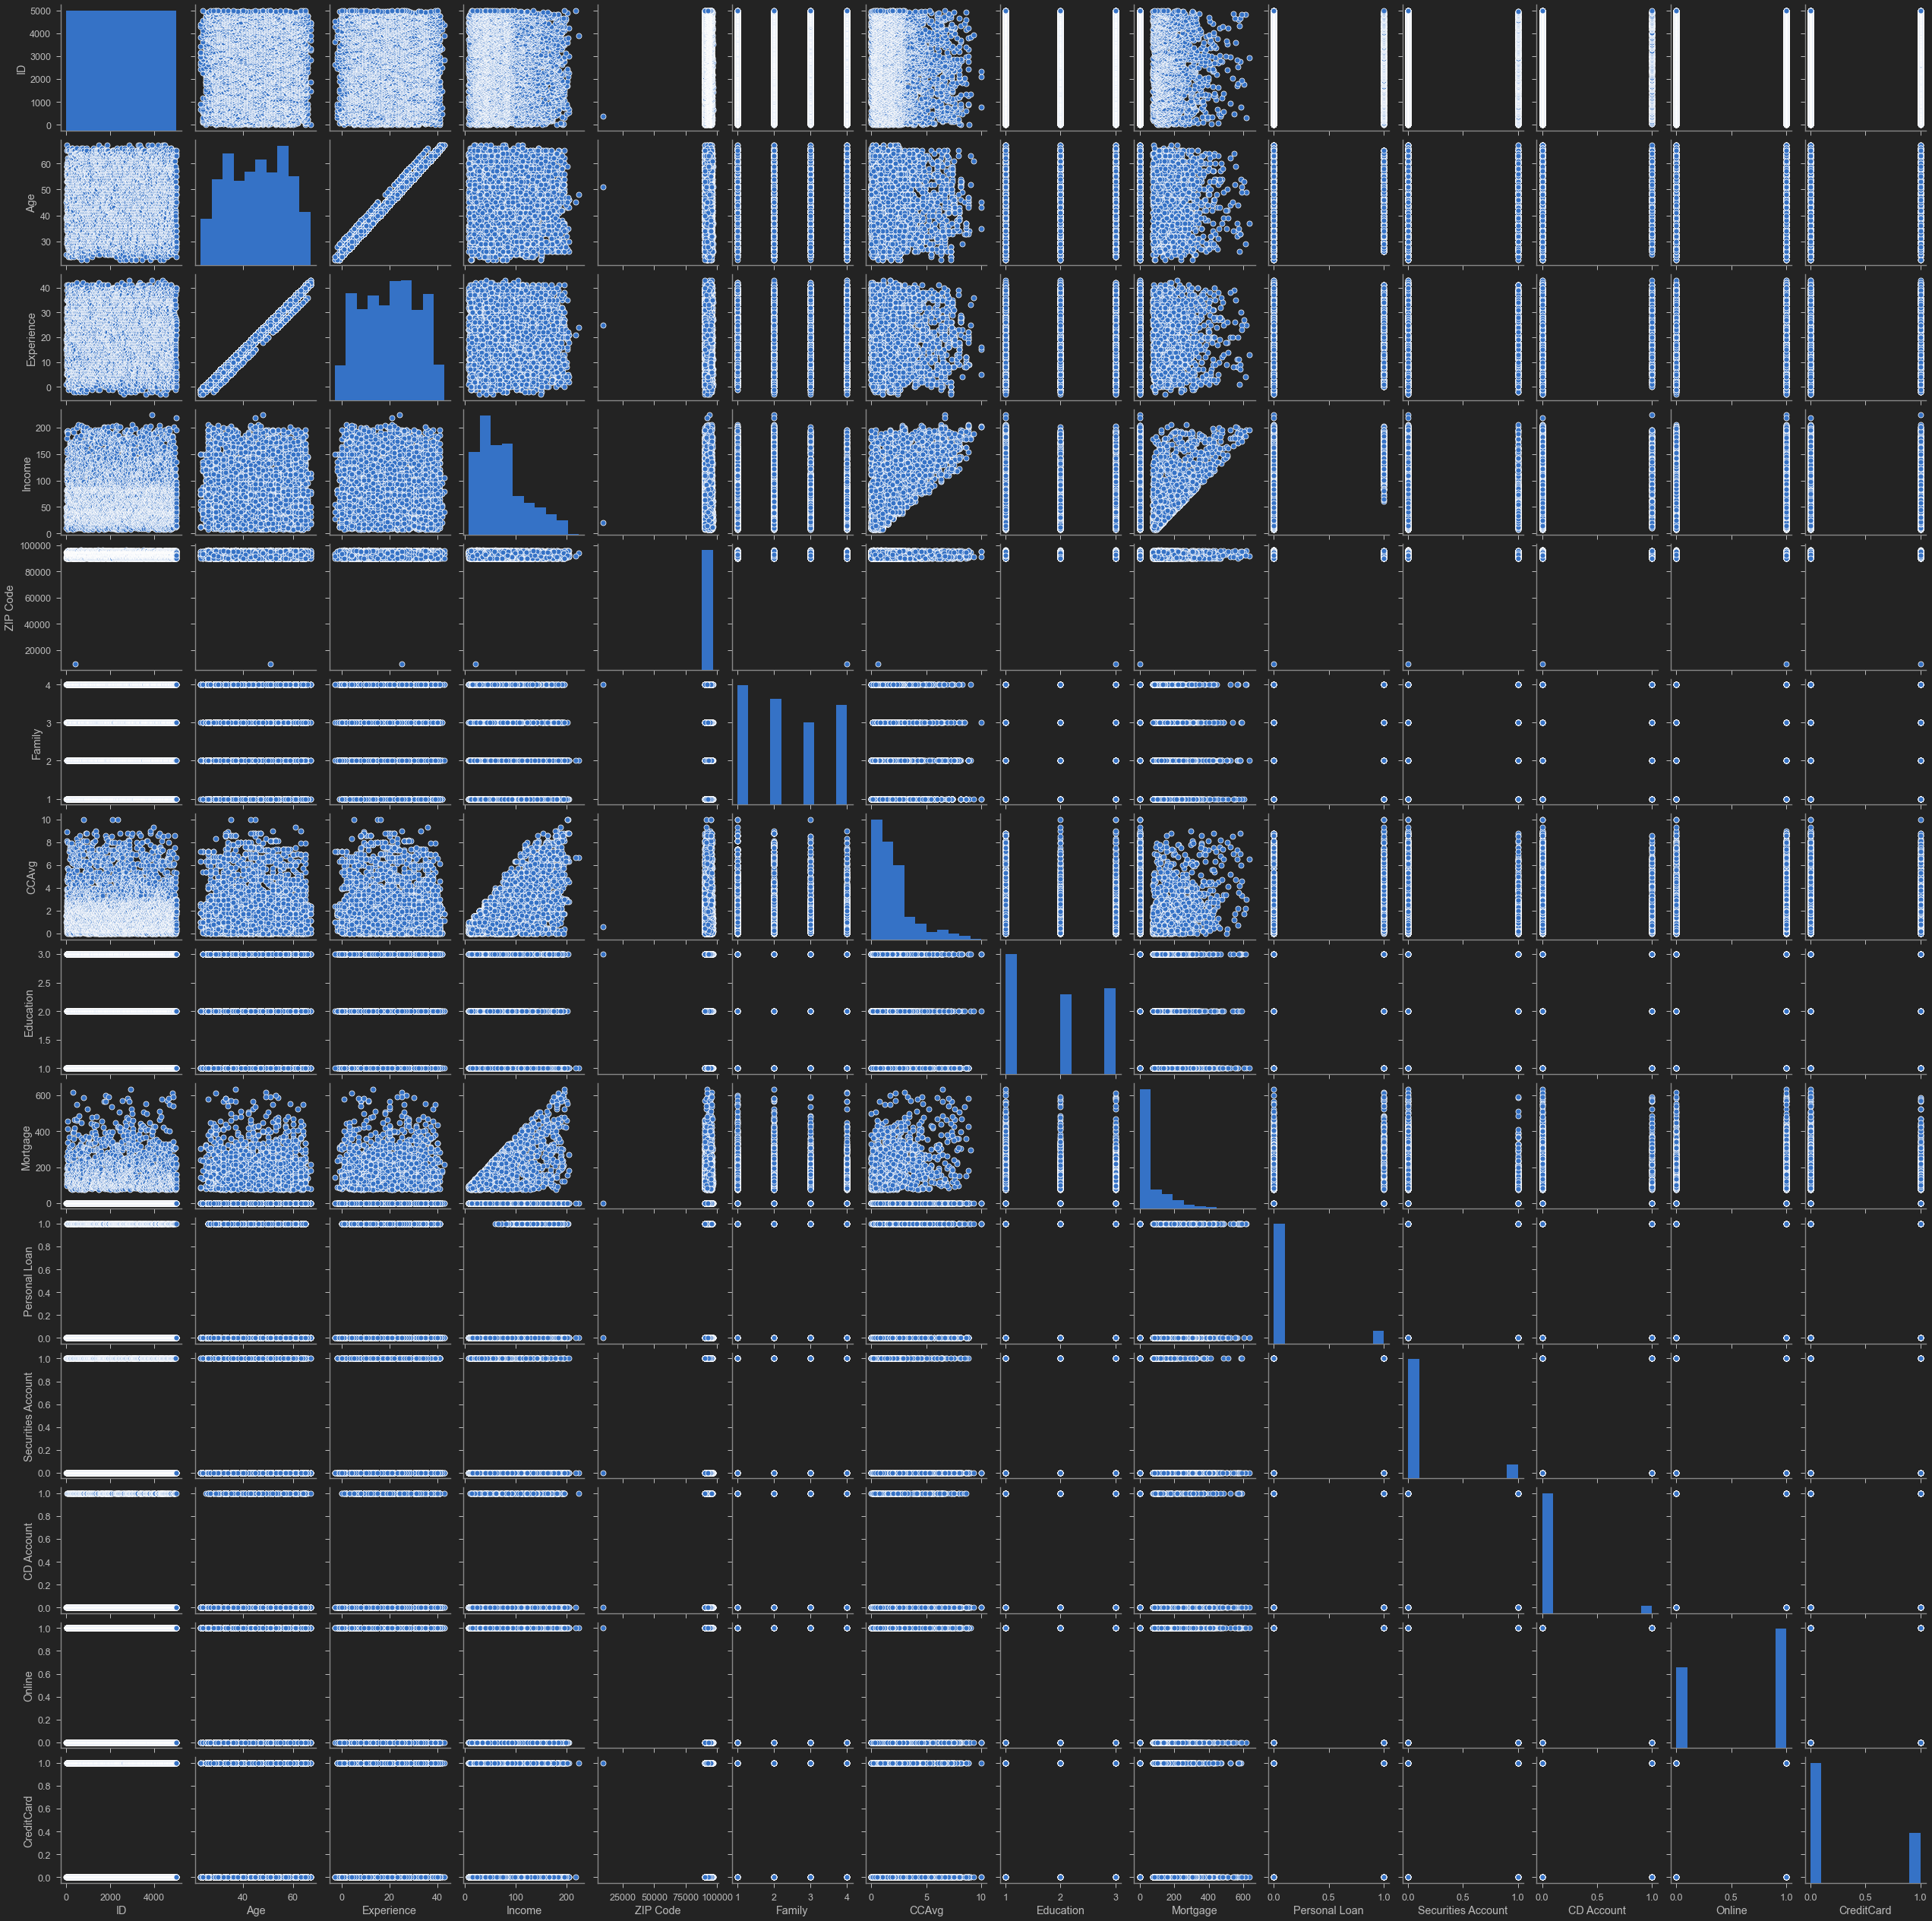

In [34]:
# Plot pairplot
plt.figure(figsize = (30, 30))
sns.pairplot(bank_df)

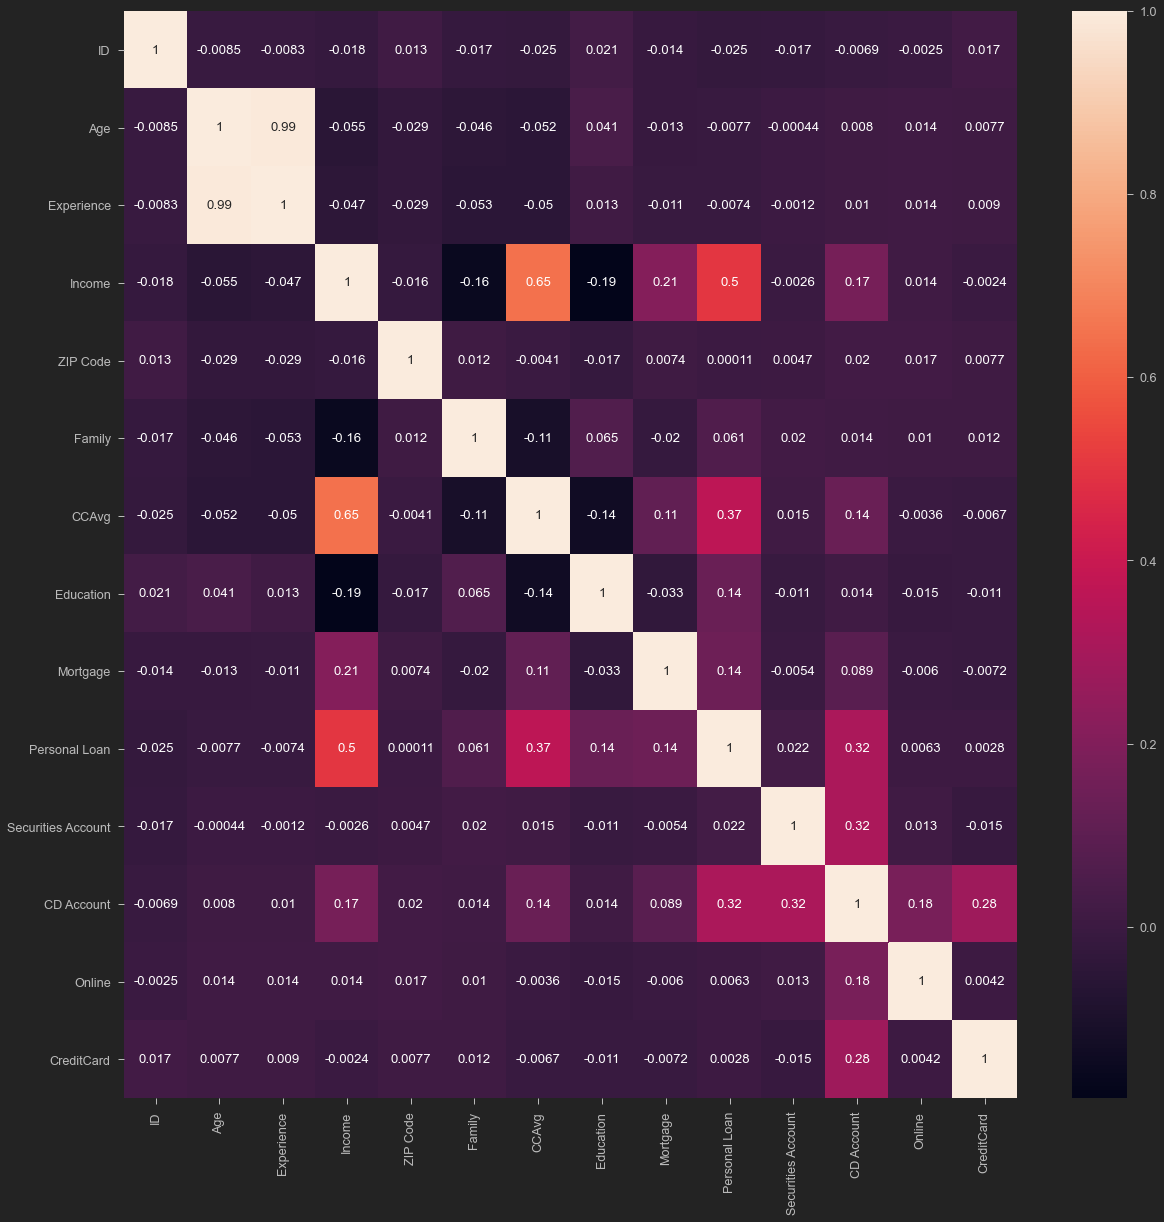

In [36]:
# Correlation plot
# Stong Positive correlation between experience and age
# Strong positive correlation between CC average and income
plt.figure(figsize = (20, 20))
cm = bank_df.corr()
sns.heatmap(cm, annot = True)

** In this above Coorelation Plot, we can see a positive correlation between CCAvg and Income!

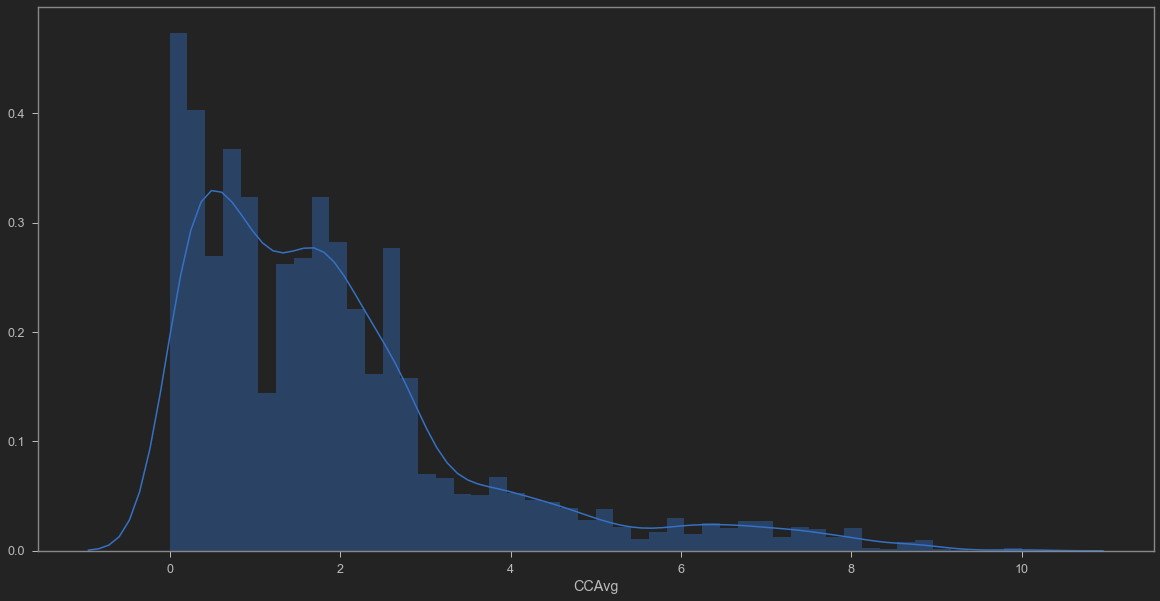

In [37]:
plt.figure(figsize = (20,10))
sns.distplot(bank_df['CCAvg'])

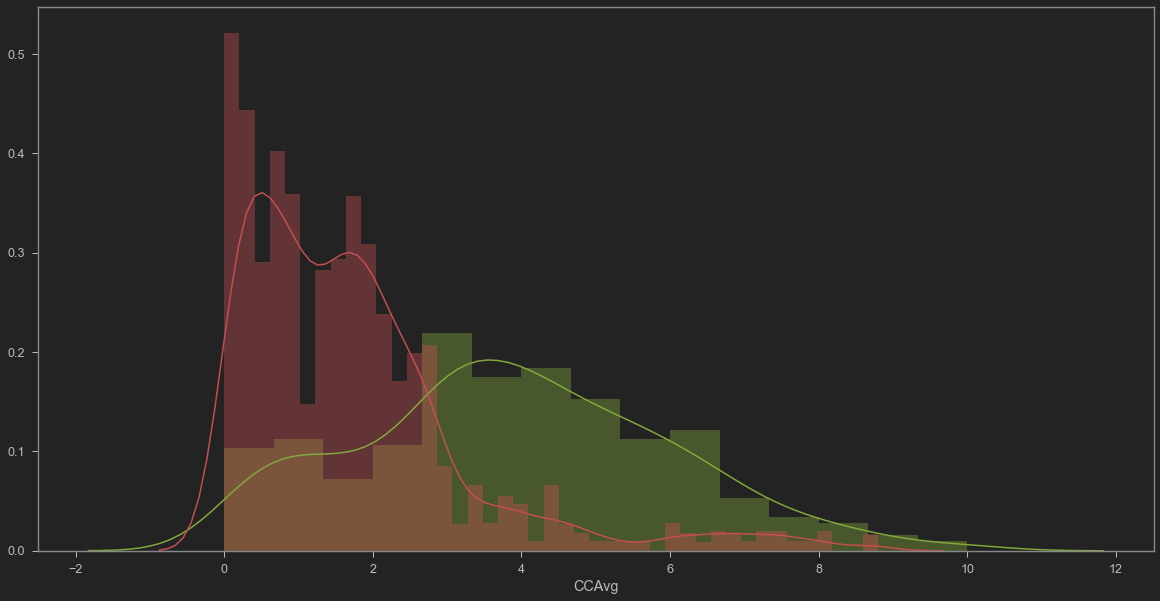

In [38]:
plt.figure(figsize = (20,10))
sns.distplot(personalloans['CCAvg'], color = 'g')
sns.distplot(no_personalloans['CCAvg'], color = 'r')

# 5. PREPARE THE DATA BEFORE TRAINING THE MODEL

In [39]:
# List all column names
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [40]:
# Specify model input features (all data except for the target variable) 
X = bank_df.drop(columns = ['Personal Loan'])
X

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [41]:
# Model output (target variable)
y = bank_df['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [42]:
from tensorflow.keras.utils import to_categorical #now we use Tensorflow / Keras 
y = to_categorical(y)
y 

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [44]:
!pip install sklearn 

tensorboard 2.1.1 has requirement setuptools>=41.0.0, but you'll have setuptools 39.0.1 which is incompatible.
google-auth 1.12.0 has requirement setuptools>=40.3.0, but you'll have setuptools 39.0.1 which is incompatible.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [45]:
# scale the data before training the model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
#StandardScaler to scale data so all features fed to Neural Network will have equal weights. "Normalize"

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)


In [53]:
# spliting the data into testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [54]:
# print the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 13), (1500, 13), (3500, 2), (1500, 2))

# 6. UNDERSTAND THE THEORY AND INTUITION BEHIND ARTIFICIAL NEURAL NETWORKS AND GRADIENT DESCENT

# Assume the activation functions of the parameters of each Input/Independent Variable (weights of those variables), with a bias that shifts activation function up or down (in this case, activates it as (1, yes) or (0, no).

### using this: y = f(X1W1 + X2W2 + X3W3 + b)

## Gradient Descent Algorithm: Optimization used to Obtain the optimized network weight
-It works by calculating the gradient of the cost function and moving it in the negative direction until the local or global minimum is achieved

-Artificial Neural Network Training Process: Training Inputs (X) go in, Error=Yhat(Predicted Output) - Y(True/Desired Output), Update the weights of the Network and run again until Error is minimized (without overfitting of course!) 

## Learning Rate, the size of the steps taken for model to become more accurate, or how aggresive the gradient descent in training the model is

### If learning rate increases, the area covered in the search space will increase so we might reach the local/global minimum faster...

### However, we can overshoot the target (or overfit the train data), which is a problem since the model will no longer be able to generalize data...

### HOWEVER! smaller learning rates will take much longer for the model to reach optimized weight values...

### Trial & Error

## Slides included to help/refresh the understanding of Gradient Descent Algorithm below...

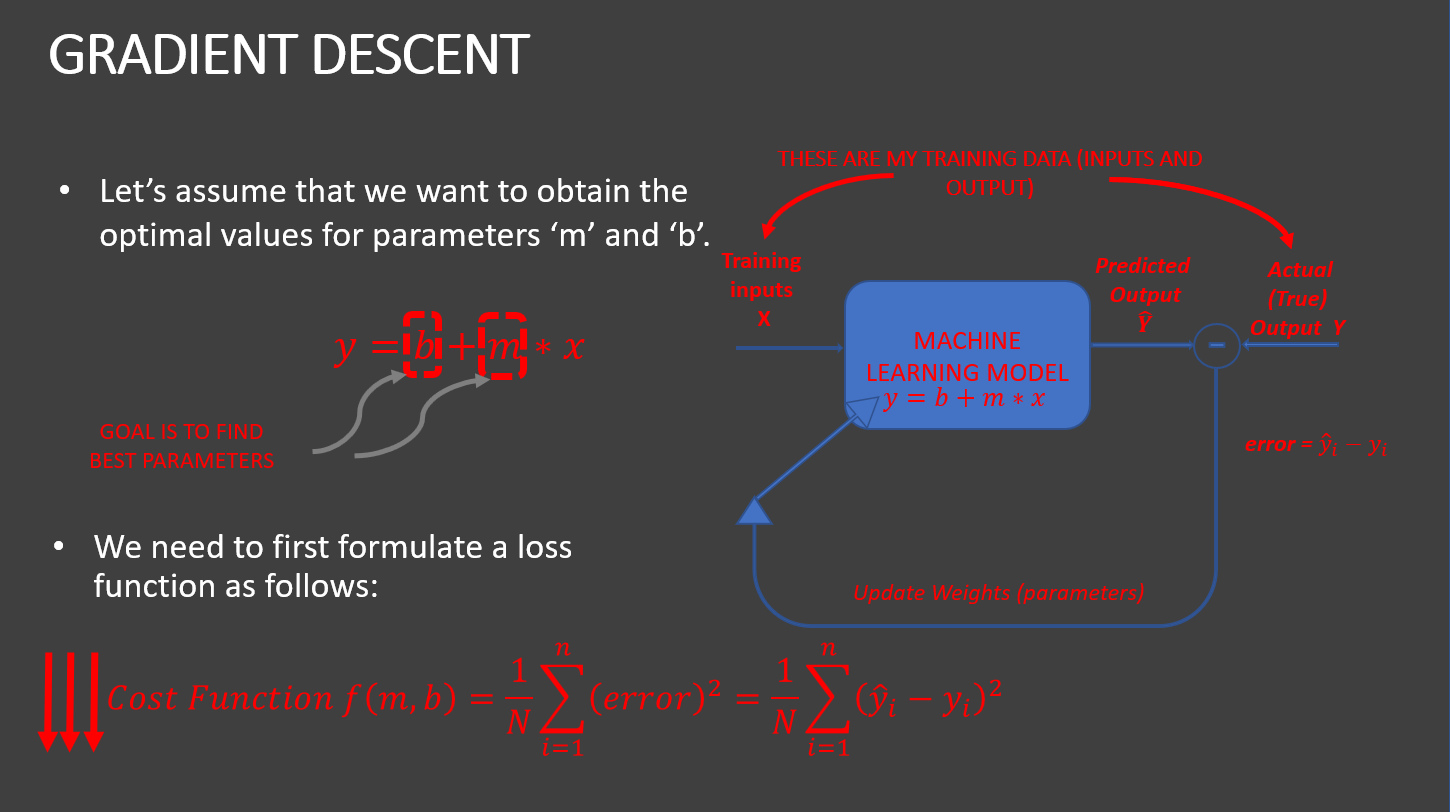

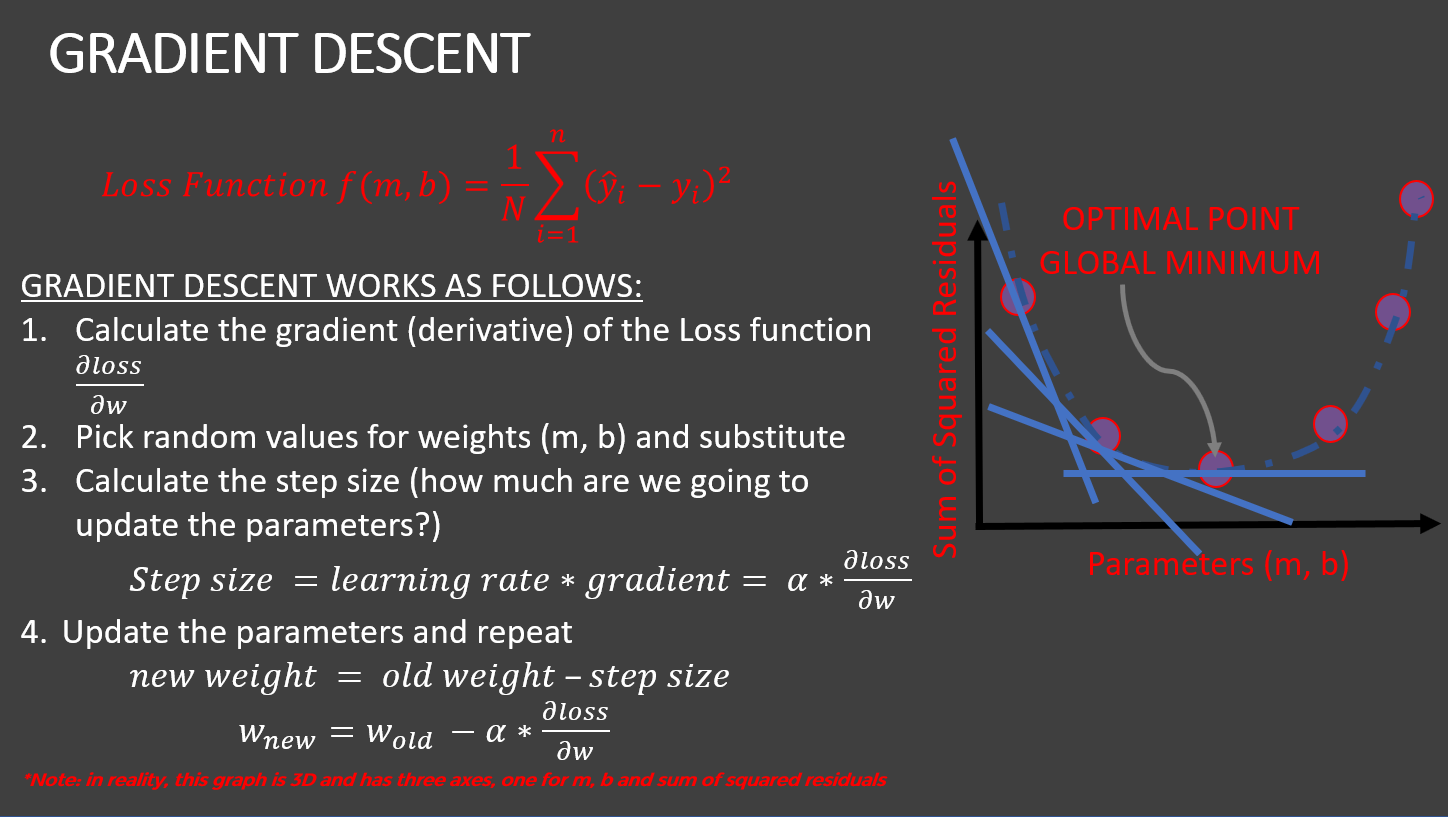

# 7. BUILD A SIMPLE MULTI LAYER NEURAL NETWORK MODEL

In [61]:
# Create keras sequential model
ANN_model = keras.Sequential()

# Add dense layer
ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu'))

ANN_model.add(Dropout(0.4)) #mostly trial and error, to make sure you dont overfit
ANN_model.add(Dense(250, activation = 'relu'))

ANN_model.add(Dropout(0.4))

# Add dense layer with softmax activation
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 250)               3500      
_________________________________________________________________
dropout_16 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 500)               125500    
_________________________________________________________________
dropout_17 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_18 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 500)              

# 8. COMPILE AND TRAIN DEEP LEARNING MODEL

In [62]:
# Compile the model
ANN_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [63]:
history = ANN_model.fit(X_train, y_train, epochs = 40, validation_split = 0.2, verbose = 1) #validation split to further divide training set to prevent overfitting the training data 

Train on 2800 samples, validate on 700 samples
Epoch 1/40
2800/2800 [==============================] - 3s 1ms/sample - loss: 0.2211 - accuracy: 0.9189 - val_loss: 0.1192 - val_accuracy: 0.9471
Epoch 2/40
2800/2800 [==============================] - 2s 794us/sample - loss: 0.1238 - accuracy: 0.9579 - val_loss: 0.0774 - val_accuracy: 0.9729
Epoch 3/40
2800/2800 [==============================] - 2s 734us/sample - loss: 0.0966 - accuracy: 0.9668 - val_loss: 0.0637 - val_accuracy: 0.9786
Epoch 4/40
2800/2800 [==============================] - 2s 712us/sample - loss: 0.0775 - accuracy: 0.9721 - val_loss: 0.0596 - val_accuracy: 0.9800
Epoch 5/40
2800/2800 [==============================] - 2s 694us/sample - loss: 0.0871 - accuracy: 0.9693 - val_loss: 0.0653 - val_accuracy: 0.9800
Epoch 6/40
2800/2800 [==============================] - 2s 732us/sample - loss: 0.0749 - accuracy: 0.9736 - val_loss: 0.0631 - val_accuracy: 0.9814
Epoch 7/40
2800/2800 [==============================] - 2s 712us/sa

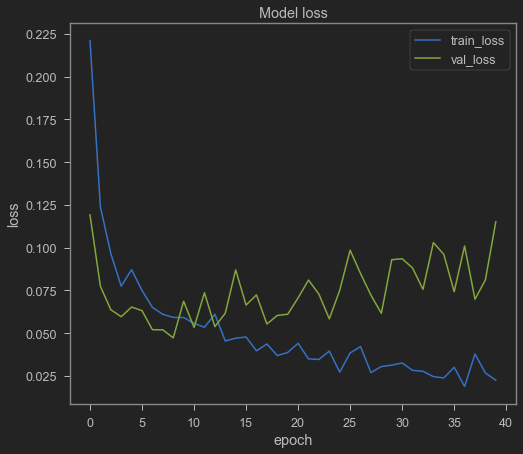

In [64]:
# Plot the model performance across epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

## As you can see in the chart, epoch (runs) after about 15-20 begin to show signs of Overfitting, where the train_loss really decreases while the val_loss really increases... we'd proabably try this again but set epochs around 20, not 40

# 9. ASSESS THE PERFORMANCE OF THE TRAINED MODEL

In [65]:
# Make predictions
predictions = ANN_model.predict(X_test)

# Append the index of max value using argmax function
predict = []
for i in predictions:
    predict.append(np.argmax(i))

In [66]:
# Get the acccuracy of the model
result = ANN_model.evaluate(X_test, y_test)

print("Accuracy : {}".format(result[1]))

1500/1500 [==============================] - 0s 243us/sample - loss: 0.0881 - accuracy: 0.9840
Accuracy : 0.984000027179718


In [67]:
# Get the original values
y_original = []

for i in y_test:
    y_original.append(np.argmax(i))

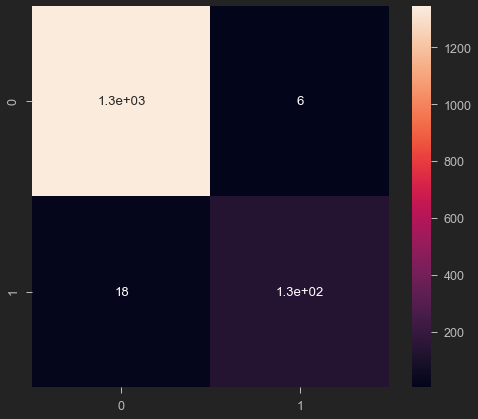

In [68]:
# Plot Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_original, predict)
sns.heatmap(confusion_matrix, annot = True)

## Confusion Matrix: Remember what this shows:
### Top Left Quadrant shows True Positive, or Outcomes where the model correctly predicts the positive class.
#### Bottom Right Quadrant shows True Negative, or Outcomes where the model correctly predicts the negative class.
### Top Right Quadrant shows False Positive AKA type 1 error, or outcomes where the model incorrectly predicts the positive class when it is actually negative.
#### Bottom Left Quadrant shows False Negative AKA type 2 error, or outcomes where the model incorrectly predicts the negative class when it is actually positive.

# Accuracy is determined by: # of correct predictions / Total Predictions

# Precision
Precision is also known as positive predictive value and is the proportion of relevant instances among the retrieved instances. In other words, it answers the question “What proportion of positive identifications was actually correct?”

# Recall
Recall, also known as the sensitivity, hit rate, or the true positive rate (TPR), is the proportion of the total amount of relevant instances that were actually retrieved. It answers the question “What proportion of actual positives was identified correctly?”

#### Specificity
Specificity, also known as the true negative rate (TNR), measures the proportion of actual negatives that are correctly identified as such. It is the opposite of recall.

# F1 Score
The F1 score is a measure of a test’s accuracy — it is the harmonic mean of precision and recall. It can have a maximum score of 1 (perfect precision and recall) and a minimum of 0. Overall, it is a measure of the preciseness and robustness of your model.


In [69]:
# Print out the classification report
from sklearn.metrics import classification_report
print(classification_report(y_original, predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1350
           1       0.96      0.88      0.92       150

    accuracy                           0.98      1500
   macro avg       0.97      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



## THIS IS AN ACCURATE MODEL TO WORK WITH!